### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [76]:
tiendas = [tienda, tienda2, tienda3, tienda4]
def facturacion(tiendas):
  return tiendas["Precio"].sum()

In [78]:
for i in range(len(tiendas)):
  print(f'La facturación total de la tienda {i+1} es: {facturacion(tiendas[i])}')

La facturación total de la tienda 1 es: 1150880400.0
La facturación total de la tienda 2 es: 1116343500.0
La facturación total de la tienda 3 es: 1098019600.0
La facturación total de la tienda 4 es: 1038375700.0


# 2. Ventas por categoría

In [88]:
def ventas_por_categoria(tiendas):
  return tiendas.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

In [90]:
for i in range(len(tiendas)):
  print(f'Las ventas por categoría de la tienda {i+1} son: \n{ventas_por_categoria(tiendas[i])}')
print(f'Las ventas por categoría de todas las tiendas son: \n{ventas_por_categoria(pd.concat(tiendas))}')

Las ventas por categoría de la tienda 1 son: 
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64
Las ventas por categoría de la tienda 2 son: 
Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0
Name: Precio, dtype: float64
Las ventas por categoría de la tienda 3 son: 
Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebles                    201072

# 3. Calificación promedio de la tienda


In [36]:
def calificacion_promedio_por_tienda(tiendas):
  promedio = round(tiendas["Calificación"].mean(),3)
  return promedio

In [37]:
for i in range(len(tiendas)):
  print(f'La calificación promedio de la tienda {i+1} es: {calificacion_promedio_por_tienda(tiendas[i])}')

La calificación promedio de la tienda 1 es: 3.977
La calificación promedio de la tienda 2 es: 4.037
La calificación promedio de la tienda 3 es: 4.048
La calificación promedio de la tienda 4 es: 3.996


# 4. Productos más y menos vendidos

In [52]:
def productos_mas_vendidos(tiendas):
  return tiendas.groupby("Producto")["Precio"].sum().sort_values(ascending=False).head(5)

def productos_menos_vendidos(tiendas):
  return tiendas.groupby("Producto")["Precio"].sum().sort_values(ascending=True).head(5)

In [53]:
for i in range(len(tiendas)):
  print(f'Los 5 productos más vendidos de la tienda {i+1} son: \n{productos_mas_vendidos(tiendas[i])}')
  print(f'Los 5 productos menos vendidos de la tienda {i+1} son: \n{productos_menos_vendidos(tiendas[i])}')

Los 5 productos más vendidos de la tienda 1 son: 
Producto
TV LED UHD 4K       142150200.0
Refrigerador        112143300.0
Iphone 15            97902200.0
Smart TV             67452100.0
Lavadora de ropa     65783600.0
Name: Precio, dtype: float64
Los 5 productos menos vendidos de la tienda 1 son: 
Producto
Cuerda para saltar     652800.0
Dinosaurio Rex         688900.0
Cubo mágico 8x8        696900.0
Set de vasos          1359100.0
Ajedrez de madera     1430600.0
Name: Precio, dtype: float64
Los 5 productos más vendidos de la tienda 2 son: 
Producto
Iphone 15           113225800.0
TV LED UHD 4K       103375000.0
Refrigerador         97632500.0
Lavadora de ropa     66762300.0
Smart TV             61142000.0
Name: Precio, dtype: float64
Los 5 productos menos vendidos de la tienda 2 son: 
Producto
Cubo mágico 8x8        643600.0
Dinosaurio Rex         770300.0
Cuerda para saltar     856900.0
Ajedrez de madera     1287700.0
Set de vasos          1542600.0
Name: Precio, dtype: float64
Los 

# 5. Envío promedio por tienda

In [61]:
def envio_promedio(tiendas):
  return round(tiendas["Costo de envío"].mean(),2)

In [62]:
for i in range(len(tiendas)):
  print(f'El envío promedio de la tienda {i+1} es: {envio_promedio(tiendas[i])}')

El envío promedio de la tienda 1 es: 26018.61
El envío promedio de la tienda 2 es: 25216.24
El envío promedio de la tienda 3 es: 24805.68
El envío promedio de la tienda 4 es: 23459.46


# Visualización

## Facturación total por tienda

In [63]:
import matplotlib.pyplot as plt

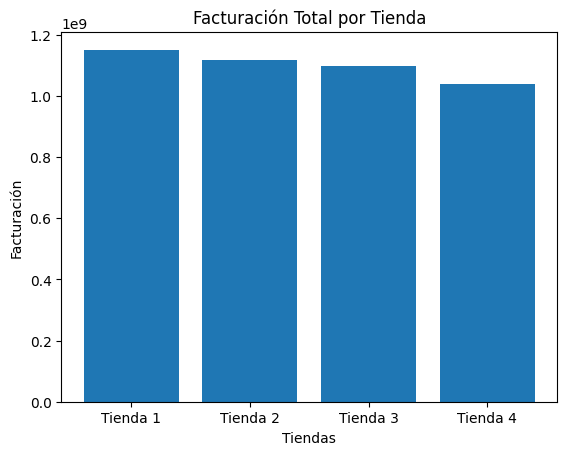

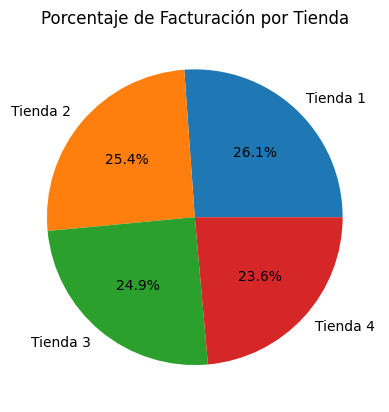

In [109]:
facturaciones = [facturacion(t) for t in tiendas]
tienda_nombres = [f'Tienda {i+1}' for i in range(len(tiendas))]

plt.bar(x=tienda_nombres, height=facturaciones)
plt.xlabel("Tiendas")
plt.ylabel("Facturación")
plt.title("Facturación Total por Tienda")
plt.show()

plt.pie(facturaciones, labels=tienda_nombres, autopct='%1.1f%%')
plt.title("Porcentaje de Facturación por Tienda")
plt.show()

## Categorias mas vendidas

Total categorias mas vendidas (Todas las tiendas)


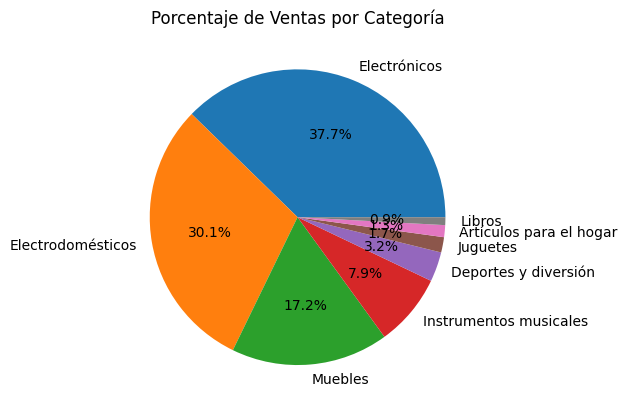

Total categorias por tienda
Categorias mas vendidas de la tienda 1


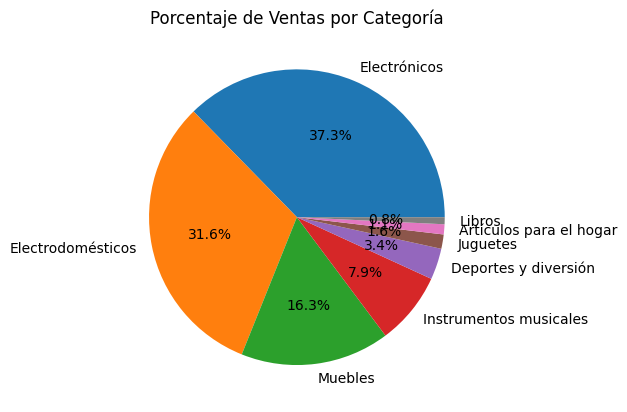

Categorias mas vendidas de la tienda 2


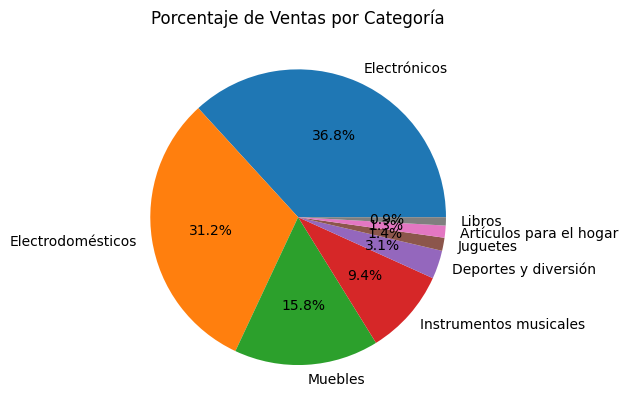

Categorias mas vendidas de la tienda 3


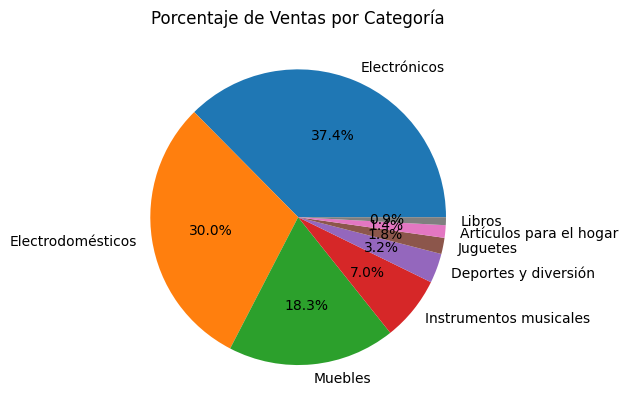

Categorias mas vendidas de la tienda 4


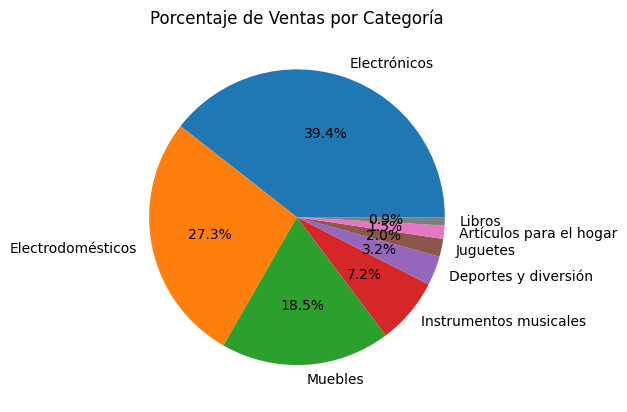

In [115]:
categorias_mas_vendidas = [ventas_por_categoria(t) for t in tiendas]
total_categorias_mas_vendidas = pd.concat(categorias_mas_vendidas).groupby("Categoría del Producto").sum().sort_values(ascending=False)

print('Total categorias mas vendidas (Todas las tiendas)')
plt.pie(total_categorias_mas_vendidas, labels=total_categorias_mas_vendidas.index, autopct='%1.1f%%')
plt.title("Porcentaje de Ventas por Categoría")
plt.show()

print('Total categorias por tienda')
for i in range(len(tiendas)):
  print(f'Categorias mas vendidas de la tienda {i+1}')
  plt.pie(categorias_mas_vendidas[i], labels=categorias_mas_vendidas[i].index, autopct='%1.1f%%')
  plt.title("Porcentaje de Ventas por Categoría")
  plt.show()

## Calificacion promedio por tiendas

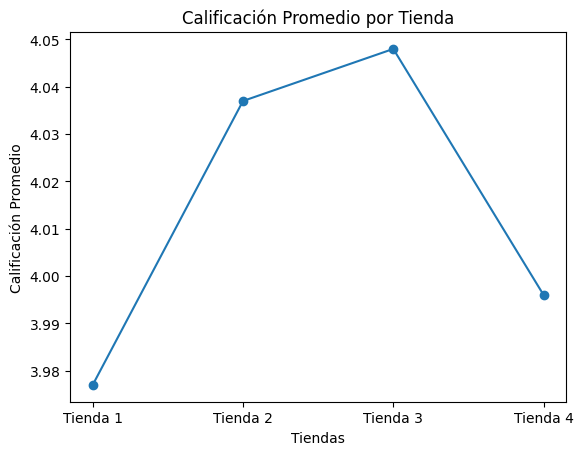

In [100]:
promedios = [calificacion_promedio_por_tienda(t) for t in tiendas]
tienda_nombres = [f'Tienda {i+1}' for i in range(len(tiendas))]

plt.plot(tienda_nombres, promedios, marker='o')
plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda")
plt.show()

## Productos mas y menos vendidos

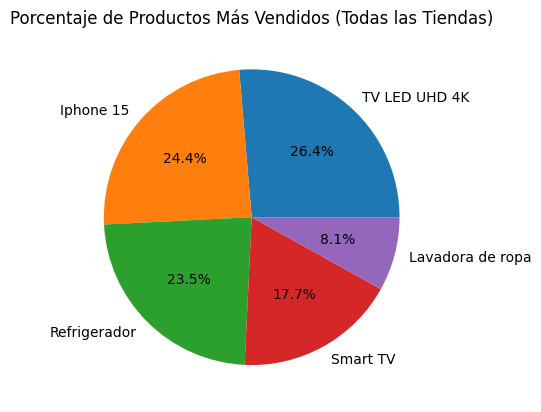

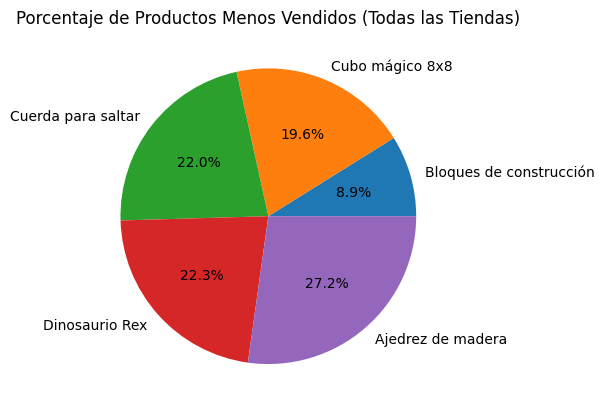

In [106]:
productos_mas_vendidos_por_tienda = [productos_mas_vendidos(t) for t in tiendas]
productos_menos_vendidos_por_tienda = [productos_menos_vendidos(t) for t in tiendas]

total_productos_mas_vendidos = pd.concat(productos_mas_vendidos_por_tienda).groupby("Producto").sum().sort_values(ascending=False).head(5)
total_productos_menos_vendidos = pd.concat(productos_menos_vendidos_por_tienda).groupby("Producto").sum().sort_values(ascending=True).head(5)

plt.pie(total_productos_mas_vendidos, labels=total_productos_mas_vendidos.index, autopct='%1.1f%%')
plt.title("Porcentaje de Productos Más Vendidos (Todas las Tiendas)")
plt.show()

plt.pie(total_productos_menos_vendidos, labels=total_productos_menos_vendidos.index, autopct='%1.1f%%')
plt.title("Porcentaje de Productos Menos Vendidos (Todas las Tiendas)")
plt.show()

## Promedio de envios por tienda

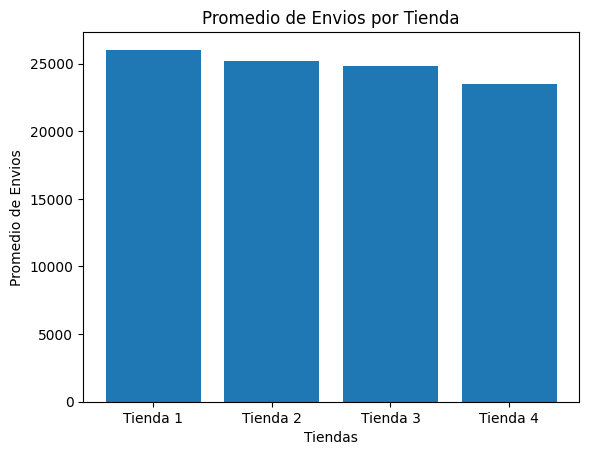

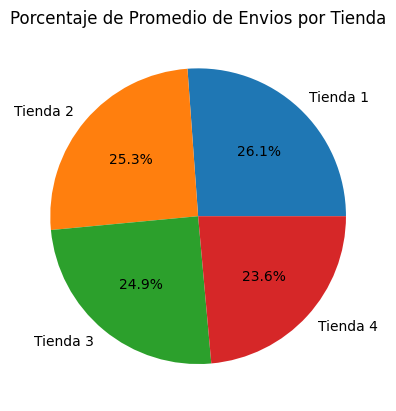

In [116]:
promedios_envios = [envio_promedio(t) for t in tiendas]
tienda_nombres = [f'Tienda {i+1}' for i in range(len(tiendas))]

plt.bar(x=tienda_nombres, height=promedios_envios)
plt.xlabel("Tiendas")
plt.ylabel("Promedio de Envios")
plt.title("Promedio de Envios por Tienda")
plt.show()

plt.pie(promedios_envios, labels=tienda_nombres, autopct='%1.1f%%')
plt.title("Porcentaje de Promedio de Envios por Tienda")
plt.show()

# Informe final

Para tomar la mejor decision se evaluó el rendimiento de las cuatro tiendas que conforman la cadena Alura Store, con el objetivo de identificar cuál de ellas resulta menos eficiente y, por tanto, es la candidata más adecuada para ser vendida. Esta decisión responde al interés del Sr. Juan por iniciar un nuevo emprendimiento, para lo cual necesita prescindir de una de sus tiendas actuales. La evaluación se basó en distintos criterios cuantitativos y cualitativos, incluyendo ingresos totales, ventas por categoría, valoraciones de los clientes, productos más y menos vendidos, y costos de envío.

Este análisis se realizó con el propósito de identificar cuál de las tiendas de Alura Store genera menores ingresos y presenta un desempeño general inferior en comparación con las demás. Para ello, se tomaron en cuenta cinco aspectos clave:

##Ingreso total por tienda
Se contabilizó el total de ventas generadas por cada tienda. La Tienda 1 fue la que obtuvo mayores ingresos, mientras que la Tienda 4 se ubicó como la que menos ingresos generó.

##Ventas por categoría
Se agruparon las ventas de productos por categoría en cada tienda. Se observó que tres categorías concentran aproximadamente el 85% de las ventas totales, tendencia que se repite en las cuatro tiendas. Del mismo modo, las categorías menos vendidas también coinciden entre tiendas, destacando la consistencia del comportamiento del consumidor.

##Valoración media por tienda
Se analizaron las calificaciones otorgadas por los clientes a los productos adquiridos. La Tienda 3 obtuvo las mejores valoraciones, mientras que la Tienda 1 recibió las calificaciones más bajas. No obstante, esta última compensa dicha debilidad con sus altos ingresos, superando ampliamente a las demás.

##Productos más y menos vendidos
En línea con las ventas por categoría, los productos más vendidos corresponden a las categorías de aparatos electrónicos y electrodomésticos —como pantallas, celulares y refrigeradores—, mientras que los menos vendidos se relacionan con juguetes y herramientas deportivas. Esta tendencia es consistente en las cuatro tiendas.

##Valor del envío promedio por tienda
Los costos de envío por tienda mostraron una relación proporcional con los ingresos. La Tienda 4 registra los costos de envío más bajos, en contraste con la Tienda 1, que presenta los más altos. La diferencia entre ambas es de aproximadamente 2.5%.



##Recomendación
Tomando en cuenta todos los aspectos analizados, la Tienda 1 destaca por generar los mayores ingresos, aunque sus calificaciones y costos de envío son los más desfavorables. Por otro lado, la Tienda 4 no solo es la que menos ingresos produce, sino que también presenta valoraciones de clientes bajas y, aunque tiene los menores costos de envío, no logra compensar su bajo rendimiento general.

Las Tiendas 2 y 3 se mantienen en un punto medio tanto en ingresos como en desempeño general, mostrando calificaciones satisfactorias y niveles aceptables de ventas y costos.

Con base en estos datos, se concluye que la Tienda 4 es la menos eficiente de las cuatro. Por lo tanto, si el objetivo es desprenderse de una tienda para iniciar un nuevo proyecto, la ideal es vender la Tienda 4.